In [15]:
import h3
from shapely import wkt
# import urbanity as urb
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

In [16]:
output_filepath = r'e:\work\spatio_evo_urbanvisenv_svi\范围线\new_2024_03_25\urban_six_area.shp'
sg_gdf = gpd.read_file(output_filepath)
print(sg_gdf.geometry.values[0])
print(sg_gdf.geometry.values[0].__geo_interface__)

POLYGON ((91.01384630192808 29.630661806914325, 91.01312382460861 29.63034589035332, 91.01244933825161 29.630693858269513, 91.01249732628555 29.631357741824207, 91.0132198042752 29.63167365854703, 91.01389429356077 29.631325691553297, 91.01384630192808 29.630661806914325))
{'type': 'Polygon', 'coordinates': (((91.01384630192808, 29.630661806914325), (91.01312382460861, 29.63034589035332), (91.01244933825161, 29.630693858269513), (91.01249732628555, 29.631357741824207), (91.0132198042752, 29.63167365854703), (91.01389429356077, 29.631325691553297), (91.01384630192808, 29.630661806914325)),)}


In [17]:
import pandas as pd  
from sklearn.preprocessing import MinMaxScaler   
  
# 初始化MinMaxScaler  
scaler = MinMaxScaler(feature_range=(0, 1))
sg_gdf['assortativ'] = scaler.fit_transform(sg_gdf[['assortativ']])
sg_gdf


,hexid,assortativ,area_m2,geometry
0,8a3c72772727fff,0.037037,19764.780841,"POLYGON ((91.01385 29.63066, 91.01312 29.63035..."
1,8a3c7274b927fff,0.037037,19777.962373,"POLYGON ((91.16697 29.64801, 91.16625 29.64769..."
2,8a3c7274962ffff,0.000000,19779.646834,"POLYGON ((91.18620 29.65253, 91.18548 29.65222..."
3,8a3c72746c27fff,0.185185,19768.449836,"POLYGON ((91.05224 29.64873, 91.05152 29.64841..."
4,8a3c7274c64ffff,0.000000,19776.605813,"POLYGON ((91.14688 29.66046, 91.14615 29.66015..."
...,...,...,...,...
2997,8a3c7274454ffff,0.185185,19769.974608,"POLYGON ((91.06597 29.66436, 91.06525 29.66405..."
2998,8a3c72746927fff,0.000000,19768.893143,"POLYGON ((91.05498 29.65764, 91.05426 29.65732..."
2999,8a3c7274112ffff,0.000000,19773.679097,"POLYGON ((91.11069 29.66331, 91.10996 29.66300..."
3000,8a3c72741577fff,0.222222,19773.182625,"POLYGON ((91.10669 29.65643, 91.10596 29.65611..."


In [18]:
file_path1 = r'e:\work\spatio_evo_urbanvisenv_svi\sv\indicator_matrix_normalization.csv'
df1 = pd.read_csv(file_path1)
df1.head()
split_data = df1.iloc[:,0].str.split('_',expand=True)
split_data.columns=['OBJECTID_1','lng','lat','data','degree_1']

for i in range(split_data.shape[1]):  
    df1[split_data.columns[i]] = split_data[split_data.columns[i]]  

split_data = df1['degree_1'].str.split('.',expand=True)
df1['degree'] = split_data[split_data.columns[0]]  

df1.head()
df1

,id,Sum_sky,Sum_plant,Sum_building,Sum_road,beautiful,boring,depressing,lively,safety,wealthy,OBJECTID_1,lng,lat,data,degree_1,degree
0,10000_91.03441834_29.63851099_201608_0.jpg,0.530283,0.000000,0.098843,0.633720,0.619445,0.507249,0.062276,0.996140,0.964733,0.532009,10000,91.03441834,29.63851099,201608,0.jpg,0
1,10000_91.03441834_29.63851099_201608_180.jpg,0.116461,0.000106,0.141364,0.525176,0.560076,0.263364,0.390571,0.995138,0.897178,0.610086,10000,91.03441834,29.63851099,201608,180.jpg,180
2,10000_91.03441834_29.63851099_201608_270.jpg,0.454458,0.001586,0.083704,0.567873,0.499536,0.458934,0.144668,0.988514,0.962822,0.542383,10000,91.03441834,29.63851099,201608,270.jpg,270
3,10000_91.03441834_29.63851099_201608_90.jpg,0.352806,0.000000,0.083109,0.587028,0.578800,0.445184,0.193289,0.991334,0.954227,0.498258,10000,91.03441834,29.63851099,201608,90.jpg,90
4,10000_91.03441834_29.63851099_202107_0.jpg,0.538046,0.000000,0.094599,0.605882,0.496118,0.694858,0.303019,0.996131,0.965381,0.721702,10000,91.03441834,29.63851099,202107,0.jpg,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86529,9_91.14076476_29.66927411_201309_90.jpg,0.315008,0.110356,0.018957,0.273661,0.707874,0.243828,0.481949,0.970699,0.964404,0.341536,9,91.14076476,29.66927411,201309,90.jpg,90
86530,9_91.14076476_29.66927411_202108_0.jpg,0.327256,0.000000,0.107086,0.641636,0.650873,0.226803,0.530096,0.955126,0.936401,0.426422,9,91.14076476,29.66927411,202108,0.jpg,0
86531,9_91.14076476_29.66927411_202108_180.jpg,0.109075,0.000094,0.133590,0.601585,0.318755,0.273338,0.815643,0.562469,0.771493,0.223110,9,91.14076476,29.66927411,202108,180.jpg,180
86532,9_91.14076476_29.66927411_202108_270.jpg,0.238887,0.000000,0.078115,0.611872,0.711322,0.347087,0.341376,0.805309,0.886107,0.381175,9,91.14076476,29.66927411,202108,270.jpg,270


In [19]:
df1 = df1[df1['data'].str.contains('2016', na=False)]
df1

,id,Sum_sky,Sum_plant,Sum_building,Sum_road,beautiful,boring,depressing,lively,safety,wealthy,OBJECTID_1,lng,lat,data,degree_1,degree
0,10000_91.03441834_29.63851099_201608_0.jpg,0.530283,0.000000,0.098843,0.633720,0.619445,0.507249,0.062276,0.996140,0.964733,0.532009,10000,91.03441834,29.63851099,201608,0.jpg,0
1,10000_91.03441834_29.63851099_201608_180.jpg,0.116461,0.000106,0.141364,0.525176,0.560076,0.263364,0.390571,0.995138,0.897178,0.610086,10000,91.03441834,29.63851099,201608,180.jpg,180
2,10000_91.03441834_29.63851099_201608_270.jpg,0.454458,0.001586,0.083704,0.567873,0.499536,0.458934,0.144668,0.988514,0.962822,0.542383,10000,91.03441834,29.63851099,201608,270.jpg,270
3,10000_91.03441834_29.63851099_201608_90.jpg,0.352806,0.000000,0.083109,0.587028,0.578800,0.445184,0.193289,0.991334,0.954227,0.498258,10000,91.03441834,29.63851099,201608,90.jpg,90
8,10001_91.03391009_29.63843157_201608_0.jpg,0.520558,0.000704,0.096699,0.611434,0.632385,0.596494,0.307276,0.996138,0.962171,0.464782,10001,91.03391009,29.63843157,201608,0.jpg,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86485,9994_91.0424122_29.6578116_201608_90.jpg,0.483897,0.395494,0.090197,0.028493,0.384943,0.394962,0.376870,0.995891,0.967714,0.650639,9994,91.0424122,29.6578116,201608,90.jpg,90
86506,9999_91.0349266_29.6385904_201608_0.jpg,0.457324,0.060879,0.026442,0.137227,0.604951,0.771767,0.473349,0.948555,0.964652,0.435636,9999,91.0349266,29.6385904,201608,0.jpg,0
86507,9999_91.0349266_29.6385904_201608_180.jpg,0.078292,0.143481,0.209891,0.001736,0.463999,0.610552,0.787143,0.155947,0.286591,0.371165,9999,91.0349266,29.6385904,201608,180.jpg,180
86508,9999_91.0349266_29.6385904_201608_270.jpg,0.234130,0.102286,0.109563,0.201728,0.492106,0.415010,0.450054,0.875534,0.790115,0.478744,9999,91.0349266,29.6385904,201608,270.jpg,270


In [20]:
df1.drop(columns=['id','degree_1'], inplace=True)  
df1.head()

C:\Users\wang.tan.GOA\AppData\Local\Temp\ipykernel_84728\1219377214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['id','degree_1'], inplace=True)


,Sum_sky,Sum_plant,Sum_building,Sum_road,beautiful,boring,depressing,lively,safety,wealthy,OBJECTID_1,lng,lat,data,degree
0,0.530283,0.000000,0.098843,0.633720,0.619445,0.507249,0.062276,0.996140,0.964733,0.532009,10000,91.03441834,29.63851099,201608,0
1,0.116461,0.000106,0.141364,0.525176,0.560076,0.263364,0.390571,0.995138,0.897178,0.610086,10000,91.03441834,29.63851099,201608,180
2,0.454458,0.001586,0.083704,0.567873,0.499536,0.458934,0.144668,0.988514,0.962822,0.542383,10000,91.03441834,29.63851099,201608,270
3,0.352806,0.000000,0.083109,0.587028,0.578800,0.445184,0.193289,0.991334,0.954227,0.498258,10000,91.03441834,29.63851099,201608,90
8,0.520558,0.000704,0.096699,0.611434,0.632385,0.596494,0.307276,0.996138,0.962171,0.464782,10001,91.03391009,29.63843157,201608,0


In [21]:
df1 = df1[['OBJECTID_1','lng','lat','data','degree','Sum_sky','Sum_plant','Sum_building','Sum_road','beautiful','boring','depressing','lively','safety','wealthy']]
df1.columns = [['OBJECTID_1','lng','lat','data','degree','sky','plant','building','road','beautiful','boring','depressing','lively','safety','wealthy',]]
df1.to_csv(r'E:\work\spatio_evo_urbanvisenv_svi\sv\sv_normalization_2013_2016.csv', index=False)


In [22]:
import pandas as pd  
import geopandas as gpd  
from shapely.geometry import Point

df1['geometry'] = df1.apply(lambda row: Point(row['lng'], row['lat']), axis=1)  
df1.head()

C:\Users\wang.tan.GOA\AppData\Local\Temp\ipykernel_84728\800225445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['geometry'] = df1.apply(lambda row: Point(row['lng'], row['lat']), axis=1)


,OBJECTID_1,lng,lat,data,degree,sky,plant,building,road,beautiful,boring,depressing,lively,safety,wealthy,geometry
0,10000,91.03441834,29.63851099,201608,0,0.530283,0.000000,0.098843,0.633720,0.619445,0.507249,0.062276,0.996140,0.964733,0.532009,POINT (91.03441834 29.63851099)
1,10000,91.03441834,29.63851099,201608,180,0.116461,0.000106,0.141364,0.525176,0.560076,0.263364,0.390571,0.995138,0.897178,0.610086,POINT (91.03441834 29.63851099)
2,10000,91.03441834,29.63851099,201608,270,0.454458,0.001586,0.083704,0.567873,0.499536,0.458934,0.144668,0.988514,0.962822,0.542383,POINT (91.03441834 29.63851099)
3,10000,91.03441834,29.63851099,201608,90,0.352806,0.000000,0.083109,0.587028,0.578800,0.445184,0.193289,0.991334,0.954227,0.498258,POINT (91.03441834 29.63851099)
8,10001,91.03391009,29.63843157,201608,0,0.520558,0.000704,0.096699,0.611434,0.632385,0.596494,0.307276,0.996138,0.962171,0.464782,POINT (91.03391009 29.63843157)


In [23]:
geo_df1 = gpd.GeoDataFrame()
# for i in df1.columns:
for i in ['sky','plant','building','road','beautiful','boring','depressing','lively','safety','wealthy','geometry']:
    # print(i[0])
    geo_df1[i] = df1[i]
geo_df1.crs = "EPSG:4326"  
geo_df1.head()
# geo_df1.columns
# geo_df1

C:\Users\wang.tan.GOA\AppData\Local\Temp\ipykernel_84728\359700267.py:5: UserWarning: Geometry column does not contain geometry.
  geo_df1[i] = df1[i]
d:\ProgramData\miniconda3\envs\pytorch\Lib\site-packages\pandas\core\frame.py:4244: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  self[key] = value[value.columns[0]]


,sky,plant,building,road,beautiful,boring,depressing,lively,safety,wealthy,geometry
0,0.530283,0.000000,0.098843,0.633720,0.619445,0.507249,0.062276,0.996140,0.964733,0.532009,POINT (91.03442 29.63851)
1,0.116461,0.000106,0.141364,0.525176,0.560076,0.263364,0.390571,0.995138,0.897178,0.610086,POINT (91.03442 29.63851)
2,0.454458,0.001586,0.083704,0.567873,0.499536,0.458934,0.144668,0.988514,0.962822,0.542383,POINT (91.03442 29.63851)
3,0.352806,0.000000,0.083109,0.587028,0.578800,0.445184,0.193289,0.991334,0.954227,0.498258,POINT (91.03442 29.63851)
8,0.520558,0.000704,0.096699,0.611434,0.632385,0.596494,0.307276,0.996138,0.962171,0.464782,POINT (91.03391 29.63843)


In [24]:
joined = gpd.sjoin(geo_df1, sg_gdf, how="left", op='intersects')  
print(joined.shape)
joined.head()

(20664, 15)


C:\Users\wang.tan.GOA\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,sky,plant,building,road,beautiful,boring,depressing,lively,safety,wealthy,geometry,index_right,hexid,assortativ,area_m2
0,0.530283,0.000000,0.098843,0.633720,0.619445,0.507249,0.062276,0.996140,0.964733,0.532009,POINT (91.03442 29.63851),104.0,8a3c727730b7fff,0.111111,19766.778309
1,0.116461,0.000106,0.141364,0.525176,0.560076,0.263364,0.390571,0.995138,0.897178,0.610086,POINT (91.03442 29.63851),104.0,8a3c727730b7fff,0.111111,19766.778309
2,0.454458,0.001586,0.083704,0.567873,0.499536,0.458934,0.144668,0.988514,0.962822,0.542383,POINT (91.03442 29.63851),104.0,8a3c727730b7fff,0.111111,19766.778309
3,0.352806,0.000000,0.083109,0.587028,0.578800,0.445184,0.193289,0.991334,0.954227,0.498258,POINT (91.03442 29.63851),104.0,8a3c727730b7fff,0.111111,19766.778309
8,0.520558,0.000704,0.096699,0.611434,0.632385,0.596494,0.307276,0.996138,0.962171,0.464782,POINT (91.03391 29.63843),405.0,8a3c7277356ffff,0.074074,19766.661343


In [25]:
geo_df2 = gpd.GeoDataFrame()
for i in ['assortativ','sky','plant','building','road','beautiful','boring','depressing','lively','safety','wealthy','hexid']:
    # print(i)
    geo_df2[i] = joined[i]
# geo_df2.crs = "EPSG:4326"  
geo_df2.head()

,assortativ,sky,plant,building,road,beautiful,boring,depressing,lively,safety,wealthy,hexid
0,0.111111,0.530283,0.000000,0.098843,0.633720,0.619445,0.507249,0.062276,0.996140,0.964733,0.532009,8a3c727730b7fff
1,0.111111,0.116461,0.000106,0.141364,0.525176,0.560076,0.263364,0.390571,0.995138,0.897178,0.610086,8a3c727730b7fff
2,0.111111,0.454458,0.001586,0.083704,0.567873,0.499536,0.458934,0.144668,0.988514,0.962822,0.542383,8a3c727730b7fff
3,0.111111,0.352806,0.000000,0.083109,0.587028,0.578800,0.445184,0.193289,0.991334,0.954227,0.498258,8a3c727730b7fff
8,0.074074,0.520558,0.000704,0.096699,0.611434,0.632385,0.596494,0.307276,0.996138,0.962171,0.464782,8a3c7277356ffff


In [26]:
geo_df3 = geo_df2.groupby('hexid', as_index=False).mean()
geo_df3

,hexid,assortativ,sky,plant,building,road,beautiful,boring,depressing,lively,safety,wealthy
0,8a3c72296d27fff,0.148148,0.431251,0.167205,0.069081,0.371369,0.667232,0.489954,0.314021,0.923410,0.856764,0.375854
1,8a3c72740017fff,0.185185,0.330631,0.058242,0.031262,0.447179,0.740305,0.382203,0.376078,0.888985,0.865215,0.463519
2,8a3c7274001ffff,0.296296,0.330080,0.034373,0.023535,0.518745,0.723871,0.387991,0.408534,0.895041,0.847459,0.493028
3,8a3c72740027fff,0.000000,0.371021,0.006388,0.054181,0.609290,0.639972,0.664719,0.522810,0.979202,0.887002,0.355036
4,8a3c7274002ffff,0.000000,0.242511,0.041691,0.071400,0.394580,0.406084,0.381523,0.656812,0.398694,0.659155,0.320267
...,...,...,...,...,...,...,...,...,...,...,...,...
1489,8a3c72773c4ffff,0.000000,0.429102,0.016295,0.149438,0.515896,0.534018,0.520585,0.297057,0.996116,0.961842,0.511083
1490,8a3c72773c5ffff,0.000000,0.360370,0.005265,0.158092,0.569486,0.620972,0.536384,0.268695,0.996165,0.962912,0.514709
1491,8a3c72773c6ffff,0.000000,0.461295,0.013078,0.101130,0.498175,0.547006,0.616200,0.256819,0.996139,0.954284,0.492882
1492,8a3c72773d37fff,0.000000,0.437147,0.083214,0.098966,0.447903,0.449237,0.648037,0.397911,0.951410,0.953473,0.453425


In [27]:
# 根据hexid分组，并计算每组的数量
geo_df4 = geo_df2.groupby('hexid').size().reset_index(name='sv_counts')
geo_df4.head()

,hexid,sv_counts
0,8a3c72296d27fff,4
1,8a3c72740017fff,24
2,8a3c7274001ffff,20
3,8a3c72740027fff,4
4,8a3c7274002ffff,4


In [28]:
final_gdf = sg_gdf.merge(geo_df3, on = 'hexid')
final_gdf = final_gdf.merge(geo_df4, on = 'hexid')
final_gdf.head()

,hexid,assortativ_x,area_m2,geometry,assortativ_y,sky,plant,building,road,beautiful,boring,depressing,lively,safety,wealthy,sv_counts
0,8a3c7274b927fff,0.037037,19777.962373,"POLYGON ((91.16697 29.64801, 91.16625 29.64769...",0.037037,0.405003,0.127502,0.125842,0.370621,0.595983,0.652561,0.411451,0.933472,0.953084,0.512382,20
1,8a3c7274962ffff,0.000000,19779.646834,"POLYGON ((91.18620 29.65253, 91.18548 29.65222...",0.000000,0.464693,0.070272,0.077487,0.463779,0.674582,0.678996,0.336746,0.886489,0.901795,0.390900,8
2,8a3c72746c27fff,0.185185,19768.449836,"POLYGON ((91.05224 29.64873, 91.05152 29.64841...",0.185185,0.224798,0.077177,0.173326,0.242296,0.520307,0.308977,0.655858,0.750721,0.756795,0.378490,24
3,8a3c7274e0f7fff,0.000000,19775.011362,"POLYGON ((91.13237 29.64385, 91.13165 29.64354...",0.000000,0.071452,0.059067,0.172163,0.265855,0.351422,0.278669,0.743372,0.785272,0.603255,0.263647,4
4,8a3c7274d09ffff,0.000000,19778.072726,"POLYGON ((91.16221 29.66907, 91.16148 29.66875...",0.000000,0.179872,0.058457,0.376202,0.493979,0.549395,0.468530,0.572358,0.906361,0.943299,0.596301,8


In [29]:

# final_gdf.head()

output_filepath = r'e:\work\spatio_evo_urbanvisenv_svi\范围线\new_2024_03_25\urban_ten_indic_matrix_2016.shp'
final_gdf.to_file(output_filepath)

C:\Users\wang.tan.GOA\AppData\Local\Temp\ipykernel_84728\2715474862.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  final_gdf.to_file(output_filepath)


In [30]:
final_gdf.shape

(1494, 16)

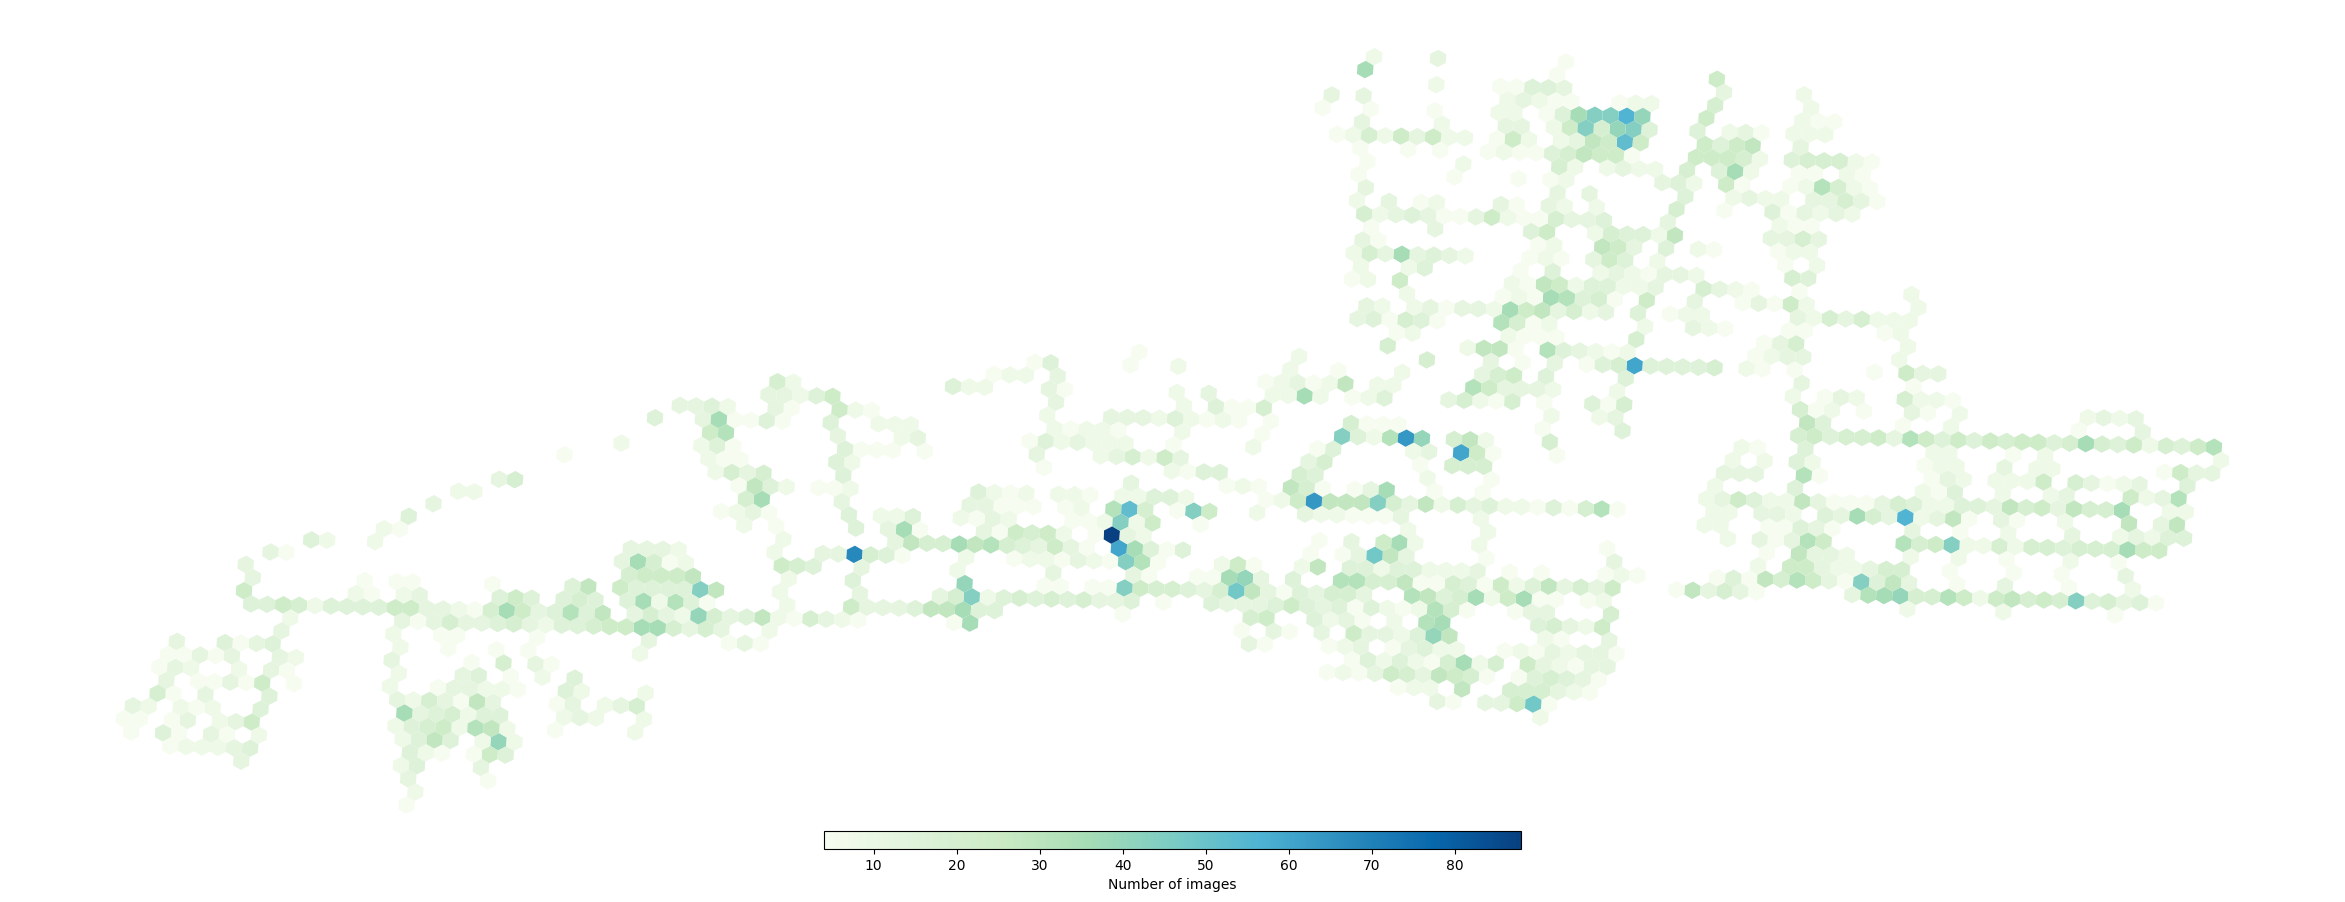

In [31]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(30, 18))

final_gdf.plot(column='sv_counts', ax=ax, cmap='GnBu', legend=True, 
               legend_kwds={'label': "Number of images",
                             'orientation': "horizontal",
                             'shrink': 0.30,
                             'anchor':(0.5, 2.2), 
                             'aspect':40, 
                             'ticks':None,},
            #    missing_kwds={"color": "black",
            #                   "edgecolor": "black",
            #                   "hatch": "//////",
            #                   "alpha":0.2,
            #                   "label": "Missing values",
            #                   }
                )

ax.set_axis_off()

# ax.set_title('Number of images - StreetView', fontsize=12, loc='left', pad=0)
# fig.suptitle('Number of images', fontsize=22, x=0.271, y = 0.94, horizontalalignment='left')
# plt.savefig(r'E:\work\spatio_evo_urbanvisenv_svi\fig\fig_5.png')
# plt.show()
